In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fruits=pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
print(fruits.shape)

(59, 7)


In [3]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [4]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


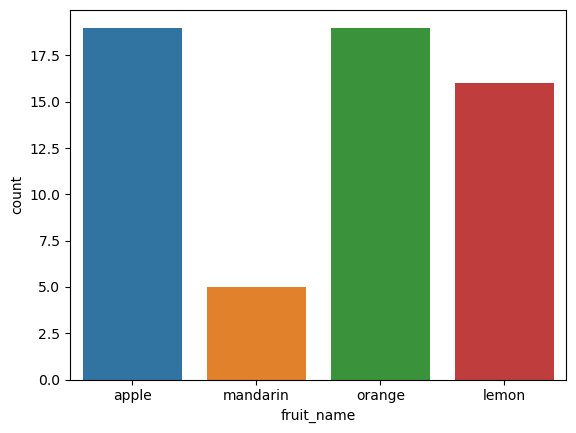

In [5]:
import seaborn as sns
sns.countplot(x=fruits['fruit_name'])
plt.show()

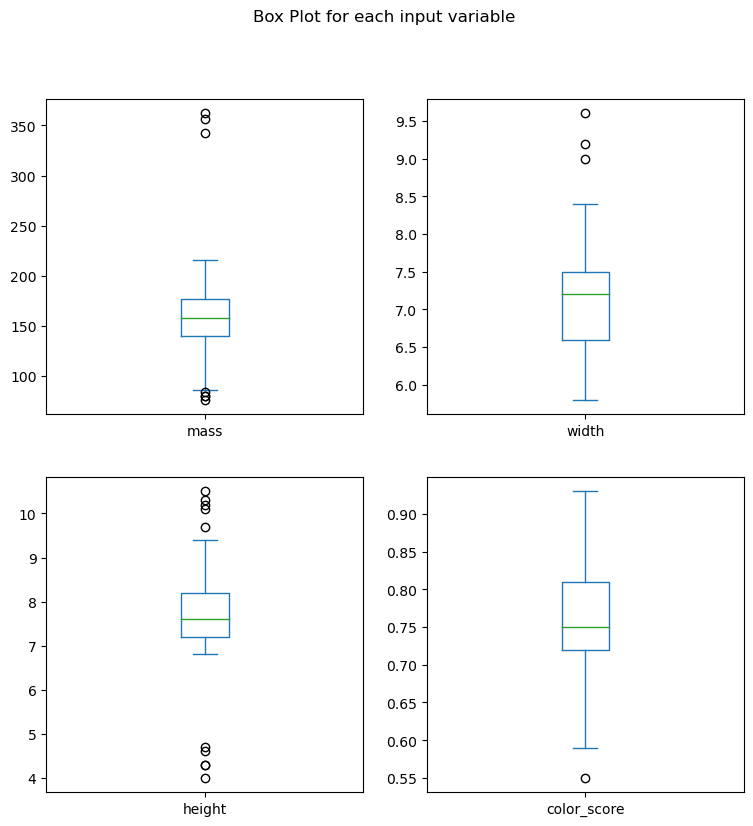

In [6]:
fruits.drop('fruit_label', axis=1).plot(kind='box' , subplots=True, layout=(2,2) , sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('fruit_box')
plt.show()

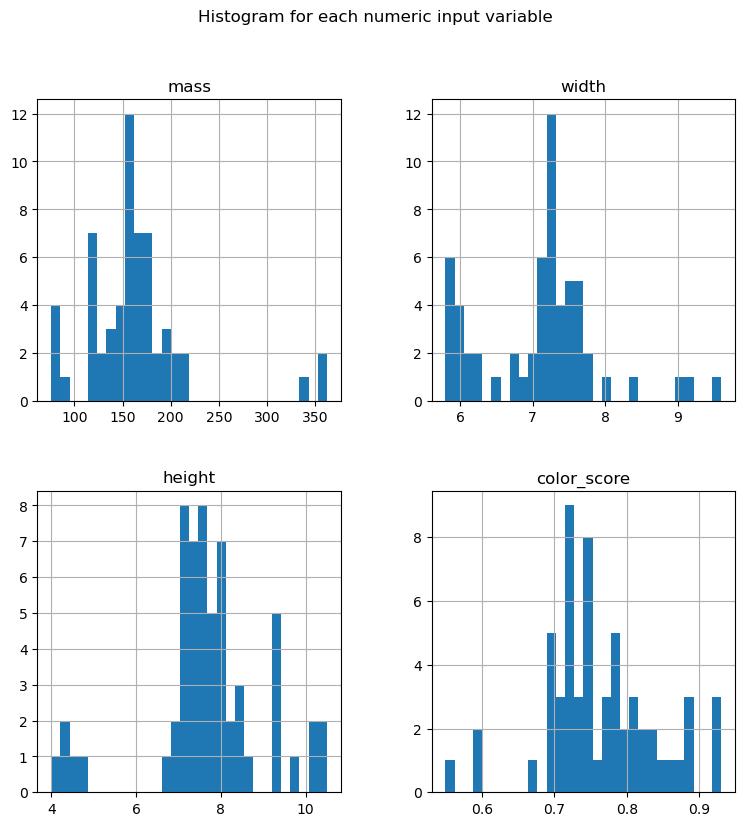

In [7]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruit_hist')
plt.show()

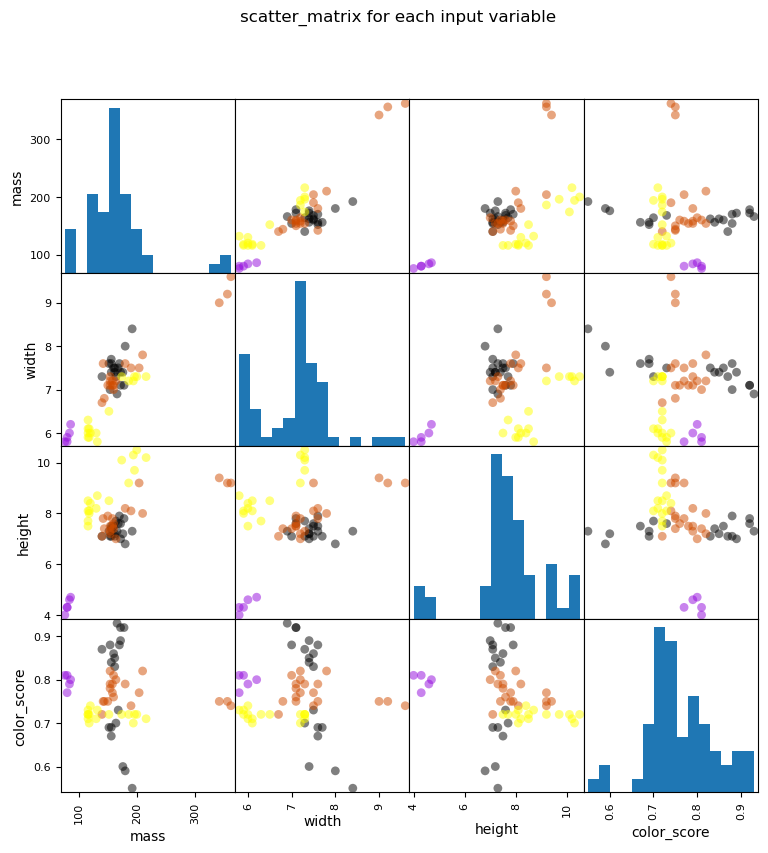

In [8]:
from pandas.plotting import scatter_matrix
from matplotlib import colormaps as cm

feature_names=['mass','width','height','color_score']
x=fruits[feature_names]
y=fruits['fruit_label']

cmap=cm['gnuplot']
scatter= scatter_matrix(x, c=y, marker='o', s = 40, hist_kwds={'bins':15},figsize=(9,9),cmap=cmap)
plt.suptitle('scatter_matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [9]:
#creating training and test sets and apply scaling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
#building models, logistic regression

from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(x_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(x_train, y_train)))
print('Accuracy of Logistics regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistics regression classifier on test set: 0.47


In [11]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
    
clf=DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(x_train,y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(x_test,y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


In [12]:
#k-nearest neighbours

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set:{:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set:0.95
Accuracy of K-NN classifier on test set:1.00


In [13]:
#linear discriminant analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda= LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(x_test, y_test)))


Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


In [14]:
# Gaussian naive bayes

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


In [16]:
#support vector machine

from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train,y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(x_train,y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(x_test,y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


In [17]:
from  sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred=knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
#plotting the decision boundary of the k-NN classifier
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

x=fruits[['mass','width','height','colo_score']]
y=fruits['fruit_label']
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)

def plot_fruit_knn(x,y,n_neighbors,weights):
    x_mat=x[['height','width']].as_matrix()
    y_mat=y.as_matrix()
    
#creating color maps
    cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF','#AFAFAF'])
    cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF','#AFAFAF'])
    
clf =neighbors.KNeighborsClassifier(n_neighbors,weights=weights)
    clf.fit(x_mat,y_mat)
    
#plot the decision boundary by assigning a color in the color map to each mesh point.
    mesh_step_size=.01 #step size in the mesh
    plot_symbol_size=50
    
    x_min,x_max=x_mat[:, 0].min() -1, x_mat[:,0].max() +1
    y_min, y_max=x_mat[:, 1].min() -1, x_mat[:, 1].max() +1
    xx, yy=np.meshgrid(np.arange(x_min,x_max, mesh_step_size), np.arange(y_min,y_max, mesh_step_size))
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    #put the result into a color plot
    z=z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,z,cmap=cmap_light)
    
    #plot training points
    